In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar arquivo para um dataframe
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [3]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
# Verificar se os dados estão corretos
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [5]:
# A dimensão paciente não faz sentido para a nossa análise e podemos remover ela
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)


In [6]:
df_exames.head()

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [7]:
# A dimensão "genero" poderia ser trocada por um número, mas isso representaria um peso, que não é o caso
# Trocar por números funciona bem em casos que podem ser ordenados, como escolaridade por exemplo.
# Para trocar neste caso, de uma variável categórica de mesmo grau de importância, podemos fazer o "One-Hot Encoding"
# Ou seja, transformar a variável categórica em uma matriz de 0 e 1

df_exames = pd.get_dummies(df_exames, columns=["genero"], dtype='int64')
df_exames.head()

# Agora temos duas colunas numéricas, de mesmo peso para fazer nossa análise

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


<Axes: >

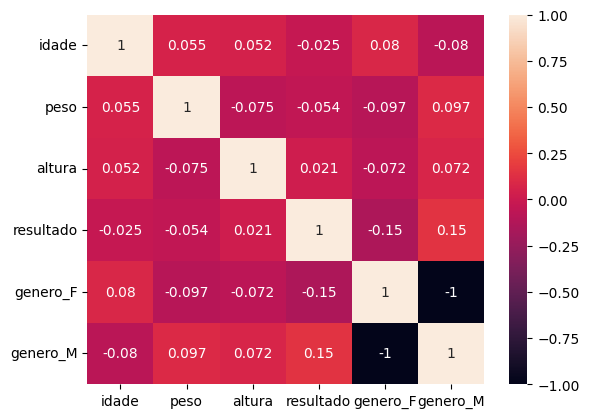

In [8]:
# Apresentar o mapa de calor com correlação entre variáveis

import seaborn as sns
sns.heatmap(df_exames.corr(), annot=True, vmax=1, vmin=-1)

<Axes: >

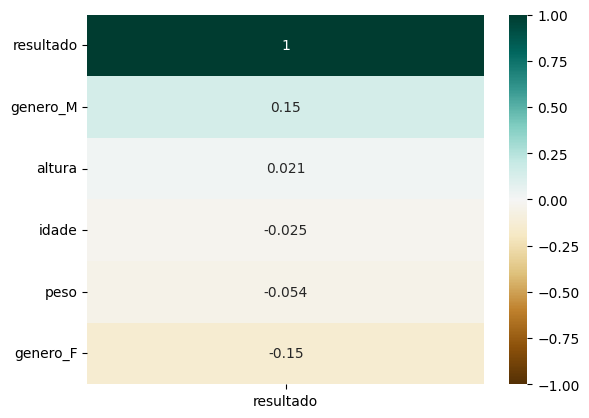

In [9]:
# Não temos nenhuma correlação aparente, em uma análise abrangente de toda a base
# Talvez em clusters de dados podemos ter, mas não em uma visão geral dos resultados dos exames

# Agora vamos fazer a mesma coisas só para o target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, vmax=1, vmin=-1, cmap='BrBG')


array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


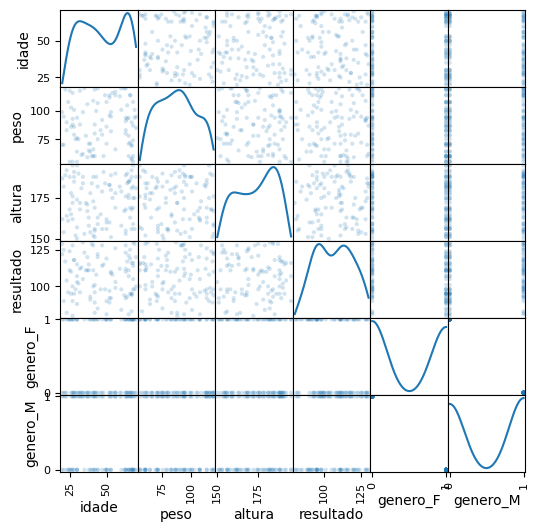

In [10]:
# Fica bem claro que nenhuma variável tem correlação direta com o resultado do exame, mesmo o genero masculino que tem o maior valor, ainda é bem baixo

# Outra análise que podemos fazer é uma dispersão com dispersão em um plot scatter

# kde, é como um histograma, mas com uma distribuição gaussiana (densidade)
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

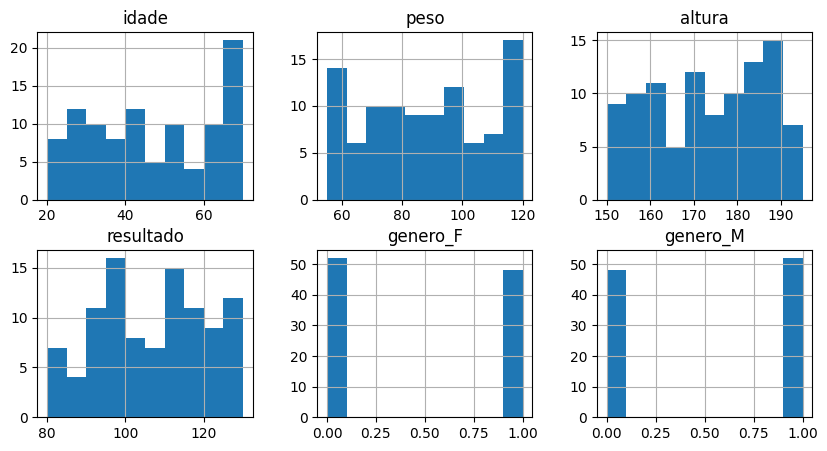

In [11]:
# Com a dispersão fica bem claro que não temos uma relação direta das variáveis com o resultado

# Histograma de todas as variáveis
df_exames.hist(layout=(2,3), figsize=(10,5))